In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'csv_files/'

df = pd.read_csv(path + 'mlb_nohitters.csv', usecols=['date', 'game_number'], parse_dates=True,
                 index_col='date')
df.head(3)

,game_number
date,
1876-07-15,140
1880-06-12,1035
1880-06-17,1046


In [3]:
df = df['1900': '2015']
df.head(3)

,game_number
date,
1900-07-12,19435
1901-07-15,20279
1902-09-20,21893


In [4]:
nohitter_times = (df.game_number.diff() - 1).values
nohitter_times = [int(number) for number in nohitter_times]
nohitter_times[:3]

ValueError: cannot convert float NaN to integer

## EXERCISE

### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array 'nohitter_times'.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ
, the typical interval time. The value of the parameter τ

that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ
you found and plot the histogram as an approximation to the PDF.

/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

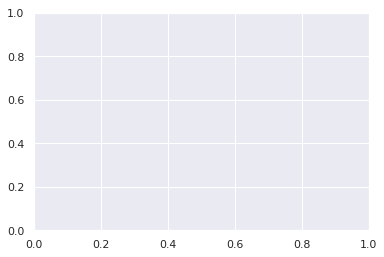

In [5]:
sns.set()

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [6]:
# constructing ECDF function (Empirical Cumulative Distribution Function)
def ecdf(data):  # converts 1D array into x and y coordinates
    
    # number of data points 
    n = len(data)
    
    # x values
    x = np.sort(data)
    
    # y values
    y = np.arange(1, 1+n) / n
    
    return x, y

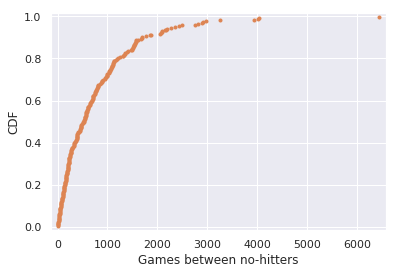

In [7]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## Linear regression by mean squares

In [8]:
df = pd.read_csv(path + '2008_election_us.csv')
df.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64


In [9]:
def pearson_r(x, y):
    
    """Function returns Pearson correlation coefficent"""
    
    corr_matrix = np.corrcoef(x, y)
    
    return corr_matrix[0, 1]

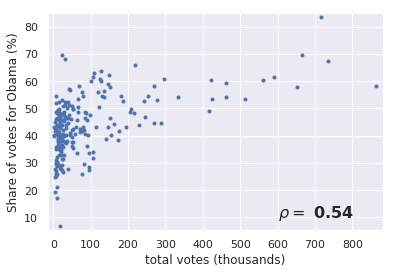

In [10]:
# Plot the total_votes vs dem_share
_ = plt.plot(df.total_votes / 1000, df.dem_share,
             marker='.', linestyle='none')

# margins and labels
plt.margins(0.02)  # 2% extra margins around the graph
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('Share of votes for Obama (%)')

_ = plt.annotate(r'$\rho =$ %.2f' % pearson_r(df.total_votes / 1000, df.dem_share), 
                 xy=(600, 10), fontsize=16, weight='bold')

plt.show()

We will assume that dem_share is a linear function of the total_votes. That is, y=ax+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal share of votes for Obama, probably somewhere near 0. The slope tells us how the dem_share varies with total votes. We can find the best fit line using np.polyfit().

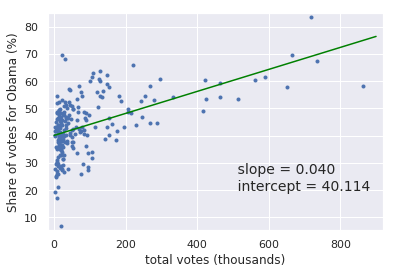

In [11]:
# plot dem_share vs total_vote
_ = plt.plot(df.total_votes / 1000, df.dem_share,
             marker='.', linestyle='none')
plt.margins(0.02) 
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('Share of votes for Obama (%)')

# Perform a linear regression using np.polyfit(): a, b

a, b = np.polyfit(x=df.total_votes / 1000, y=df.dem_share, deg=1)  # deg is the first degree polynomial 
                                                                   # which a straight line is.

# Make theoretical line to plot
x = np.array([0, 900])

y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y, color='green')

_ = plt.annotate(' slope = %.3f\n intercept = %.3f' % (a, b),
                 xy=(500, 20), fontsize=14)

plt.show()

## Geneating bootstrap replicates

Resampling an array of data. We choose randomly data points from an array and store it into replicate array. The point is that the data points are chosen at random, giving chance to pick the same sample each time. Such resampling generates new summary statistics (mean, median, std) and thus gives us some kind of interval in which these summary statistic paramaters can vary.

Bootstrapping - the use of resampled data to perform statistical inference. Numpy function np.random.choice() provides that.

In [12]:
np.random.choice([1,2,3,4,5], size=5)  # size is the number of samples we want to take out

array([2, 1, 1, 1, 4])

In [13]:
df = pd.read_csv(path + 'morley.csv', usecols=['Speed'])

df.Speed = df.Speed + 299000
df.Speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: Speed, dtype: int64

In [14]:
bootstrap_samples = np.random.choice(df.Speed, size=len(df.Speed))

## EXERCISE

In [15]:
rainfall = np.array([875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793.])

Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

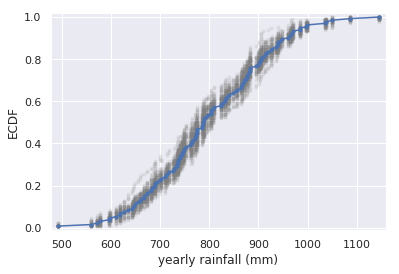

In [16]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

### Bootstrap confidence intervals

In [17]:
# lets create a function that produced bootstrap replicates
# with desired output function
def bs_rep_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

In [18]:
# lets make a for loop to store 10,000 replicates into single array
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bs_rep_1d(df.Speed, np.mean)

/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


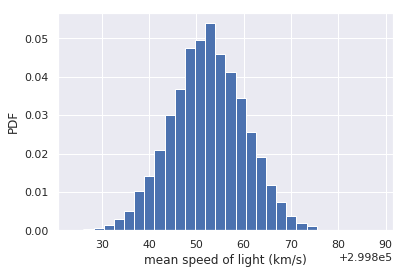

In [19]:
_ = plt.hist(bs_replicates, bins=30, normed=True)

_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')

plt.show()

Generating many bootstrap replicates

In [20]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_rep_1d(data, func)

    return bs_replicates

Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

10.510549150506188
10.487082116122744


/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


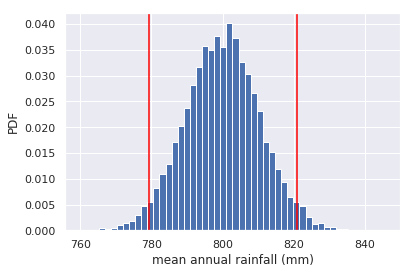

In [21]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

conf_int = np.percentile(bs_replicates, q=[2.5, 97.5])

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

_ = plt.axvline(x=conf_int[0], color='red')
_ = plt.axvline(x=conf_int[1], color='red')

# Show the plot
plt.show()

To get the 95% confidence interval we simply can calculate its edges 2.5th and 97.5th percentile.

In [22]:
conf_int = np.percentile(bs_replicates, q=[2.5, 97.5])

'The 95%% confidence interval of rainfall is in between %.0f and %.0f mm' % (conf_int[0], conf_int[1])

'The 95% confidence interval of rainfall is in between 779 and 821 mm'

### Pairs bootstraps for linear regression

Just like before we select data points but this time in pairs. For example, in x value we have democratic share votes and in y total votes for particular data point (county).

A function to do pairs bootstrap

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [23]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [24]:
df = pd.read_csv(path + '2008_election_us.csv')

[3.31980852e-05 4.95713467e-05]


/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


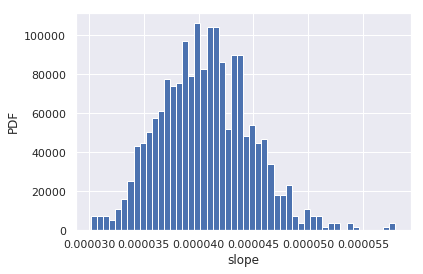

In [25]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df.total_votes, df.dem_share, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

In [26]:
np.max(df.total_votes)

863486

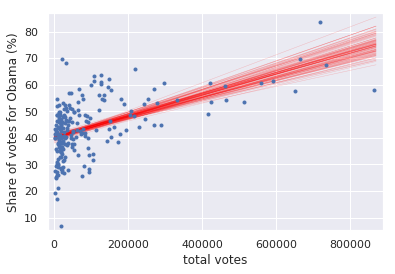

In [27]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 870000])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df.total_votes, df.dem_share, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('total votes')
_ = plt.ylabel('Share of votes for Obama (%)')
plt.margins(0.02)
plt.show()

### Formulating and simulating hypothesis

Hypothesis testing - assesing how reasonable it is that our model describes observed data.

Hypothesis testing - assessment of how reasonable the observed data are assuming a hypotheis is true.

Null hypothesis - another name for the hypothesis you are testing

Election dataset: we hypotheise that Pennsylvania (PA) and Ohio (OH) have identical county level voting probability distributions. We have voting data to test this hypothesis. Lets start of by plotting ecdf of county level votes for these states.

In [28]:
def plot_scatter(x, y, marker='.', ls='none', title=None, xl=None, yl=None, margin=0.02, 
              legend=False, label=None, color=None):
    """Scatter plot plotting function
    Parameters:
        x - x coordinate
        y - y coordinate
        marker - style of the marker, default '.'
        ls - linestyle, default 'none'
        title - title, defualt None
        xl - x label
        yl - y label
        margin - extra margin around the plot, default 0.02 (2%)
        legend - legend, default False
        label - label of the plot
        """
    
    _ = plt.plot(x, y, marker=marker, linestyle=ls, label=label, color=color)
    _ = plt.title(title)
    _ = plt.xlabel(xl)
    _ = plt.ylabel(yl)
    plt.margins(margin)
    
    if legend is True:
        _ = plt.legend(loc='best')

In [29]:
def plot_hist(x, bins=None, htype='bar',normed=False, title=None, xl=None, yl=None, margin=0.02, 
              legend=False, label=None, color=None):
    """Histogram plotting function
    Parameters:
        x - x coordinate
        bins - no of bins, defualt 10
        htype - histogram type, defualt 'bar
        title - title, defualt None
        xl - x label
        yl - y label
        margin - extra margin around the plot, default 0.02 (2%)
        """
    
    _ = plt.hist(x, bins=bins, histtype=htype, linestyle=ls, normed=normed, label=label,
                 color=color)
    _ = plt.title(title)
    _ = plt.xlabel(xl)
    _ = plt.ylabel(yl)
    plt.margins(margin)
    
    if legend is True:
        _ = plt.legend(loc='best')

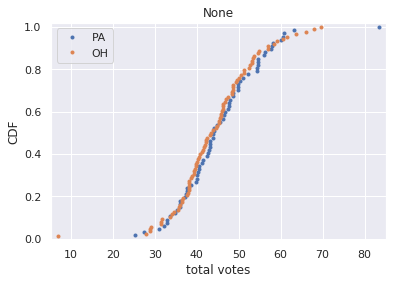

In [30]:
x_pa, y_pa = ecdf(df[df.state == 'PA']['dem_share'])
x_oh, y_oh = ecdf(df[df.state == 'OH']['dem_share'])

plot_scatter(y=y_pa, x=x_pa,
             xl='total votes', yl='CDF', label='PA')

plot_scatter(y=y_oh, x=x_oh,
             xl='total votes', yl='CDF', label='OH')
_ = plt.legend(loc='best')

plt.show()

Ohio has just a little bit more support for Obama in the middle of the CDF. We could also compare some summary statistics

In [31]:
print('dem_share_mean_oh = %.2f%%\ndem_share_mean_pa = %.2f%%\nPA - OH difference = %.2f %%' 
      % (np.mean(df[df.state == 'OH']['dem_share']), np.mean(df[df.state == 'PA']['dem_share']), 
         abs(np.mean(df[df.state == 'OH']['dem_share']) - np.mean(df[df.state == 'PA']['dem_share']))))

dem_share_mean_oh = 44.32%
dem_share_mean_pa = 45.48%
PA - OH difference = 1.16 %


The means, medians and stds are quite close but we cant conclude. Thus we could simulate county level votes, assuming (null hypothesis) that their voting trends are identically distributed.

We can do the simulation by putting all the PA and OH state dem_share data points together and then ignore in what state they belong to. Next, we randomly scramble the order of the counties and we then rename the first data points again for PA and OH respectively. So we just redid the electon as if there were no difference of if it was PA or OH. 

Permutation - random reordering of entries in an array. This is the core of simulating 0 hypothesis as if both quantites were identically distributed. 

#### Generating a permutation sample

In [32]:
# extract dem shares for PA and OH
dem_share_oh = df[df.state == 'OH']['dem_share']
dem_share_pa = df[df.state == 'PA']['dem_share']

# putting PA and OH samples together into single array
dem_share_both = np.concatenate((dem_share_pa, dem_share_oh))

# randomly reordering the entries of PA and OH
dem_share_perm = np.random.permutation(dem_share_both)

# extracting random data points of dem share for both states, depending on their initial lengths
perm_sample_pa = dem_share_perm[: len(dem_share_pa)]
perm_sample_oh = dem_share_perm[len(dem_share_pa):]

In [33]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1): ]
    
    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling

In [34]:
rain_june = np.array([66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])
rain_november = np.array([83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed. 

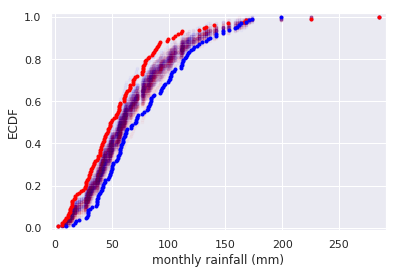

In [35]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

### Test statistics and p-values

We test the 0 hypothesis that the county level voting between two states PA and OH are identically distributed. How do we assess the hypothesis and what do we quantify in there. Remember the hypothesis testing was to assess how reasonable the observed data are assuming the hypothesis is true.

Test statistic - A single number that can be computed from observed data and from data you simulate under the null hypothesis. It serves as a basis of comparison between the two. If these two states OH and Pa were identical, they should have identical mean vote share for Obama, so the difference in mean vote share should be 0. Thus we choose the difference in mean for our test statistic.

p - value: The probability of obtaining a value of your test statistic taht is at least as extreme as what was observed, under the assumption that the null hypotheiss is true. <font color='red'>NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE!!</font>  p-value is only meaningful if the null hypothesis is clearly stated along with the state statistic evaluated.

If p-value is small: data are statistically significantly different then what we would have observed under the null hypotheis. 

## EXERCISE

Generating permutation replicates

In [36]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

In [37]:
d = {'ID': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
     'impact_force': [1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ,  0.172,  0.142,  0.037,  0.453,
        0.355,  0.022,  0.502,  0.273,  0.72 ,  0.582,  0.198,  0.198,
        0.597,  0.516,  0.815,  0.402,  0.605,  0.711,  0.614,  0.468]}
df = pd.DataFrame(data=d)
df.head(3)

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327


Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

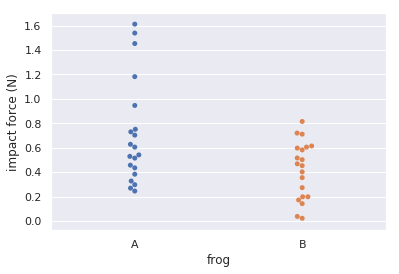

In [38]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

In [39]:
force_a = df[df.ID == 'A']['impact_force']
force_b = df[df.ID == 'B']['impact_force']

Permutation test on frog data

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [40]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0049


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## EXERCISE

A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [41]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b + 0.55 - np.mean(force_b)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0064


 The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as force_a and force_b.

In [42]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.007


You may remember that we got p = 0.0063 from the permutation test, and here we got p = 0.0055. These are very close, and indeed the tests are testing the same thing. However, the permutation test exactly simulates the null hypothesis that the data come from the same distribution, whereas the bootstrap test approximately simulates it. As we will see, though, the bootstrap hypothesis test, while approximate, is more versatile.

## A/B testing

A/B testing: used by organizations to see if a strategy change gives better result

### Exercise

The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [44]:
np.random.seed(42)

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

### Exercise

A time-on-website analog

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that is actually a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

In [46]:
nht_dead = np.array([-1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [49]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', round(p, 5))

p-val = 0.0002


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

Its always good idea to do the EDA first. Yes! Always a good idea to do first! I encourage you to go ahead and plot the ECDFs right now. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

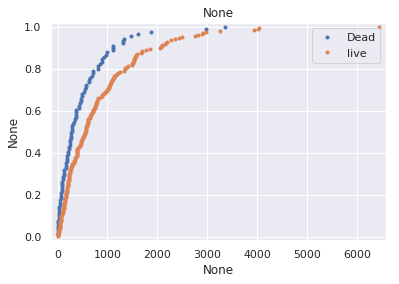

In [50]:
x_d, y_d = ecdf(nht_dead)
x_l, y_l = ecdf(nht_live)

plot_scatter(x=x_d,y=y_d, xl='inter no hitter times', yl='CDF', label='Dead')
plot_scatter(x=x_l, y=y_l, label='live')

_ = plt.legend(loc='best')

plt.show()

### Test of correlation

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

In [51]:
df = pd.read_csv(path + 'female_literacy_fertility.csv')

df.head(3)

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"


In [64]:
illiteracy = np.array([9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])
fertility = df.fertility

Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [65]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', round(p, 4))

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.